In [162]:
import pandas as pd
import numpy as np
import plotly.express as px

In [163]:
df = pd.read_csv("train_ctrUa4K.csv")
df_original = df.copy()

##### Check Duplicated Data

In [164]:
df.duplicated().sum()

0

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [166]:
df.drop('Loan_ID' , axis = 1 , inplace = True)

##### Check duplicated data again

In [167]:
df.duplicated().sum()

0

##### Univariate Analysis

In [168]:
df["Gender"].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [169]:
px.histogram(data_frame=df , x = "Gender")

In [170]:
df["Married"].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [171]:
df["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

**Here we will deal the number of Dependents as categorical feature , and we will encode it , so no need for cleaning it.**

In [172]:
df["Education"].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [173]:
df["Self_Employed"].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [174]:
df["ApplicantIncome"].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [175]:
px.histogram(data_frame=df , x ="ApplicantIncome")

In [176]:
px.box(data_frame=df , x ="ApplicantIncome")

In [177]:
df[df["ApplicantIncome"] == df["ApplicantIncome"].max()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


In [178]:
px.histogram(data_frame =  df , x = "CoapplicantIncome")

In [179]:
df[df['CoapplicantIncome'] == df["CoapplicantIncome"].max()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
600,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N


In [180]:
px.histogram(data_frame = df  , x = 'LoanAmount')

In [181]:
df[df["LoanAmount"] == df["LoanAmount"].max()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
171,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y


In [182]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [183]:
px.histogram(data_frame=df , x  = 'Loan_Amount_Term' )

**There are some outliers , we can try removing it and not removing it then test the model**

In [184]:
df["Credit_History"].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [185]:
df["Property_Area"].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [186]:
df["Loan_Status"].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

### Feature Engineering

In [187]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [188]:
df["TotalIncome"] = df["ApplicantIncome"] + df["CoapplicantIncome"]

In [189]:
df["Paid_Amount_Per_Month"] = round((df["LoanAmount"] * 1000) / df['Loan_Amount_Term'], 2 )

In [190]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Paid_Amount_Per_Month
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,355.56
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,183.33
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,333.33
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,391.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,197.22
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,222.22
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,702.78
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,519.44


In [191]:
df["Income_After_Loan"] = df["ApplicantIncome"] - df["Paid_Amount_Per_Month"]

In [192]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome', 'Paid_Amount_Per_Month', 'Income_After_Loan'],
      dtype='object')

### Bivariate Analysis

#### what is the number of married males and females and aslo the number of not married ?

In [193]:
df["duumy"] = 1 

In [194]:
pd.pivot_table(data=df , index = 'Gender' , columns = 'Married' , values = 'duumy' , aggfunc=len)

Married,No,Yes
Gender,,
Female,80,31
Male,130,357


In [195]:
px.histogram(data_frame=df , x ="Gender" , color="Married" ,barmode='group' , text_auto=True)

#### What is the number of educated males and females in the dataset ?

In [196]:
pd.pivot_table(data=df , index = 'Gender' , columns = 'Education' , values = 'duumy' , aggfunc=len)

Education,Graduate,Not Graduate
Gender,,
Female,92,20
Male,376,113


In [197]:
px.histogram(data_frame=df , x ="Gender" , color="Education" ,barmode='group' , text_auto=True)

#### What is the number of Employed males and females in the dataset ?

In [198]:
pd.pivot_table(data=df , index = 'Gender' , columns = 'Self_Employed' , values = 'duumy' , aggfunc=len)

Self_Employed,No,Yes
Gender,,
Female,89,15
Male,402,63


#### Is there a releationship between the income and the gender ?

In [199]:
df.groupby("Gender")["ApplicantIncome"].mean()

Gender
Female    4643.473214
Male      5446.460123
Name: ApplicantIncome, dtype: float64

#### Is there a releationship between the gender and the required loan Amount ?

In [200]:
df.groupby("Gender")["LoanAmount"].mean()

Gender
Female    126.697248
Male      149.265957
Name: LoanAmount, dtype: float64

#### what is the gender that has a better credit history ?

In [201]:
pd.pivot_table(data=df , index = 'Gender' , columns = 'Credit_History' , values = 'duumy' , aggfunc=len)  

Credit_History,0.0,1.0
Gender,,
Female,17,84
Male,69,382


#### Is there any releationship between the education and the employement ?

In [202]:
(pd.pivot_table(data=df , index = 'Education' , columns = 'Self_Employed' , values = 'duumy' , aggfunc=len)  * 100 ) / df.shape[0]

Self_Employed,No,Yes
Education,,
Graduate,63.355049,10.586319
Not Graduate,18.078176,2.768730


#### does the Education affect the applicant income ?

In [203]:
df.groupby("Education")["ApplicantIncome"].mean()

Education
Graduate        5857.433333
Not Graduate    3777.283582
Name: ApplicantIncome, dtype: float64

In [204]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome', 'Paid_Amount_Per_Month', 'Income_After_Loan', 'duumy'],
      dtype='object')

#### Is the Gender affect the probability of getting approved ?

In [205]:
def get_Percentage_of_acceptance(Feature):
    Feature_List = df[Feature].value_counts().index.tolist()
    for category in Feature_List:
        print( f'{category} percentage is \n{df[(df[Feature] == category)]["Loan_Status"].value_counts(normalize = True)*100} ')
        print("*" * 20)
        

In [206]:
get_Percentage_of_acceptance('Credit_History')

1.0 percentage is 
Loan_Status
Y    79.578947
N    20.421053
Name: proportion, dtype: float64 
********************
0.0 percentage is 
Loan_Status
N    92.134831
Y     7.865169
Name: proportion, dtype: float64 
********************


#### Or we can use crammers v correleation for categorical variables

In [207]:
from dython.nominal import associations

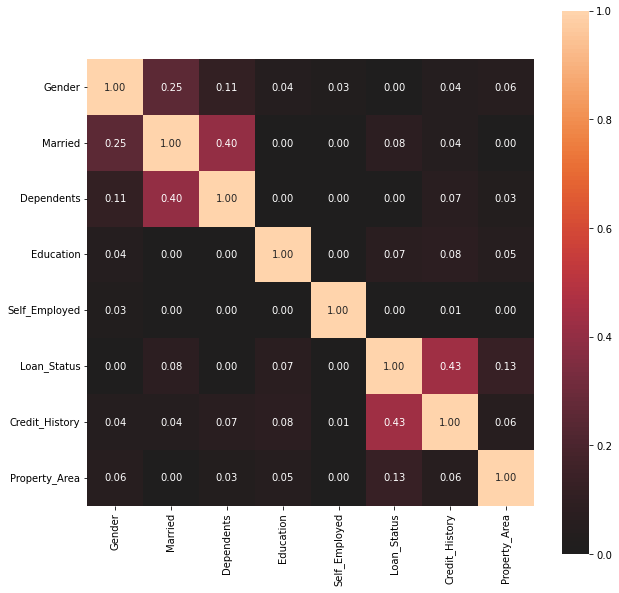

In [208]:
selected_column= df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Status','Credit_History', 'Property_Area']]
categorical_df = selected_column.copy()
categorical_correlation= associations(categorical_df, filename= 'categorical_correlation.png', figsize=(10,10))

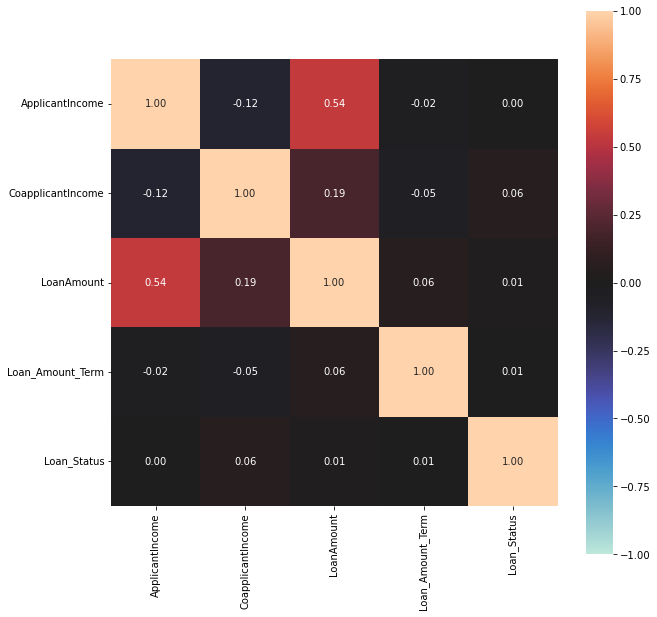

In [209]:
selected_column= df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term' ,'Loan_Status']]
categorical_df = selected_column.copy()
categorical_correlation= associations(categorical_df, filename= 'categorical_correlation.png', figsize=(10,10))

In [210]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome', 'Paid_Amount_Per_Month', 'Income_After_Loan', 'duumy'],
      dtype='object')

#### Data Preparation for Machine Learning

In [211]:
px.histogram(data_frame=df , x = "ApplicantIncome")

In [212]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome', 'Paid_Amount_Per_Month', 'Income_After_Loan', 'duumy'],
      dtype='object')

In [213]:
logged_Columns = ["TotalIncome" ,"Paid_Amount_Per_Month" , "Income_After_Loan" ]
for col in logged_Columns:
    df["Log" + col] = np.log(df[col])

C:\Users\karim.hamdy\Anaconda3\envs\ML\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning:

invalid value encountered in log



In [214]:
px.histogram(data_frame=df , x = "LogIncome_After_Loan")

In [215]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome', 'Paid_Amount_Per_Month', 'Income_After_Loan', 'duumy',
       'LogTotalIncome', 'LogPaid_Amount_Per_Month', 'LogIncome_After_Loan'],
      dtype='object')

In [216]:
df.drop(['ApplicantIncome', 'CoapplicantIncome', 'TotalIncome', 'Paid_Amount_Per_Month', 'Income_After_Loan', 'duumy'] ,axis = 1 , inplace = True)

In [217]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LogTotalIncome,LogPaid_Amount_Per_Month,LogIncome_After_Loan
0,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,Y,8.674026,NaN,NaN
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,8.714568,5.873694,8.349352
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,8.006368,5.211288,7.943311
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,8.505323,5.809133,7.718539
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,8.699515,5.970420,8.632008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.0,360.0,1.0,Rural,Y,7.972466,5.284320,7.902036
610,Male,Yes,3+,Graduate,No,40.0,180.0,1.0,Rural,Y,8.320205,5.403668,8.264564
611,Male,Yes,1,Graduate,No,253.0,360.0,1.0,Urban,Y,9.025456,6.555044,8.905067
612,Male,Yes,2,Graduate,No,187.0,360.0,1.0,Urban,Y,8.933664,6.252751,8.862704


In [218]:
df.isnull().sum()

Gender                      13
Married                      3
Dependents                  15
Education                    0
Self_Employed               32
LoanAmount                  22
Loan_Amount_Term            14
Credit_History              50
Property_Area                0
Loan_Status                  0
LogTotalIncome               0
LogPaid_Amount_Per_Month    36
LogIncome_After_Loan        41
dtype: int64

#### We will use One Hot Encoder for all categorical columns
#### KNN Imputer for imputing numerical missing values
#### Simple Imputer with Mode for Imputing Categorical Missing values

In [219]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , StandardScaler , LabelEncoder , RobustScaler
from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import MultinomialNB , GaussianNB
from sklearn.model_selection import train_test_split , cross_validate
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [220]:
x = df.drop("Loan_Status" , axis = 1 )
y = df["Loan_Status"]

In [221]:
y = LabelEncoder().fit_transform(y)

In [222]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    601 non-null    object 
 1   Married                   611 non-null    object 
 2   Dependents                599 non-null    object 
 3   Education                 614 non-null    object 
 4   Self_Employed             582 non-null    object 
 5   LoanAmount                592 non-null    float64
 6   Loan_Amount_Term          600 non-null    float64
 7   Credit_History            564 non-null    float64
 8   Property_Area             614 non-null    object 
 9   LogTotalIncome            614 non-null    float64
 10  LogPaid_Amount_Per_Month  578 non-null    float64
 11  LogIncome_After_Loan      573 non-null    float64
dtypes: float64(6), object(6)
memory usage: 57.7+ KB


In [223]:
Num_Columns = x.select_dtypes(include="number")
Cat_Columns = x.select_dtypes(include="object_")

In [224]:
Num_Steps = list()
Num_Steps.append(("Num_Imputer" , KNNImputer()))
Num_Steps.append(("Scaler" , StandardScaler()))
Num_Pipeline = Pipeline(steps=Num_Steps)

In [225]:
Cat_Steps = list()
Cat_Steps.append(("Cat_Imputer" , SimpleImputer(strategy='most_frequent')))
Cat_Steps.append(("Cat_Encoder" , OneHotEncoder(sparse=False , drop='first')))
Cat_Pipeline = Pipeline(steps= Cat_Steps)

In [226]:
Transformer = ColumnTransformer(transformers=[('Num' , Num_Pipeline , Num_Columns.columns) , ('Cat' , Cat_Pipeline , Cat_Columns.columns) ] , remainder='passthrough')

In [227]:
steps = list()
steps.append(("Preprocessing" , Transformer))
steps.append(("Model" , LogisticRegression()))
pipeline = Pipeline(steps=steps)

In [228]:
results = cross_validate(pipeline , x , y , scoring="accuracy"  ,cv = 5 , return_train_score=True)

In [229]:
results["train_score"].mean()

0.8033406189459044

In [230]:
results["test_score"].mean()

0.8062241769958683

In [231]:
models = list()
models.append(("LR" , LogisticRegression()))
#models.append(("MNBA" , MultinomialNB()))
models.append(("GNB" , GaussianNB()))
models.append(("SVM" , SVC()))
models.append(("CART" , DecisionTreeClassifier()))
models.append(("RF" , RandomForestClassifier()))
models.append(("XG" , XGBClassifier()))
models.append(("KNN" , KNeighborsClassifier()))


In [232]:
for model in models:
    steps = list()
    steps.append(("Preprocessing" , Transformer))
    steps.append(model)
    pipeline = Pipeline(steps = steps)
    scores = cross_validate(pipeline , x , y , scoring="accuracy"  ,cv = 5 , return_train_score=True)
    print(model[0])
    print("Train_accuracy" , scores["train_score"].mean() )
    print("-" * 10)
    print("Test_accuracy" , scores["test_score"].mean())
    print("-" * 20)
    print("\n")
    

LR
Train_accuracy 0.8033406189459044
----------
Test_accuracy 0.8062241769958683
--------------------


GNB
Train_accuracy 0.7996787707184608
----------
Test_accuracy 0.7915367186458749
--------------------


SVM
Train_accuracy 0.8257322868544369
----------
Test_accuracy 0.8045581767293083
--------------------


CART
Train_accuracy 1.0
----------
Test_accuracy 0.7280687724910035
--------------------


RF
Train_accuracy 1.0
----------
Test_accuracy 0.7801412768226044
--------------------


XG
Train_accuracy 1.0
----------
Test_accuracy 0.755631080900973
--------------------


KNN
Train_accuracy 0.8326544467074
----------
Test_accuracy 0.7866320138611222
--------------------




In [233]:
steps = list()
steps.append(("Preprocessing" , Transformer))
steps.append(("SVM" , SVC()))
pipeline = Pipeline(steps = steps)
scores = cross_validate(pipeline , x , y , scoring="accuracy"  ,cv = 5 , return_train_score=True,return_estimator=True)
print("Train_accuracy" , scores["train_score"].mean() )
print("-" * 10)
print("Test_accuracy" , scores["test_score"].mean())
print("-" * 20)
print("\n")


Train_accuracy 0.8257322868544369
----------
Test_accuracy 0.8045581767293083
--------------------




In [234]:
pipeline["SVM"].get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [235]:
from sklearn.model_selection import GridSearchCV
params = [
        {'SVM__C':[0.5,1,2,3,5], 'SVM__kernel':['linear', 'sigmoid', 'poly']},
        {'SVM__C':[0.5,1,2,3,5], 'SVM__kernel':['rbf'], 'SVM__gamma':[0.5, 0.6, 0.7, 0.1, 0.01, 0.05,"scale"]},
        {'SVM__C':[0.5,1,2,3,5], 'SVM__kernel':['poly'] , "SVM__degree" :[2,3,4,5]},
         ]


In [236]:
steps = list()
steps.append(("Preprocessing" , Transformer))
steps.append(("SVM" , SVC()))
pipeline = Pipeline(steps = steps)

In [237]:
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=params,
                           scoring='accuracy',
                           cv=5, n_jobs=-1,return_train_score=True)
grid_search.fit(x, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Num',
                                                                         Pipeline(steps=[('Num_Imputer',
                                                                                          KNNImputer()),
                                                                                         ('Scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'LogTotalIncome',
       'LogPaid_Amount_Per_Month', 'LogIncome_After_Loan'],
      dtype='object')),
                                                                        ('Cat',
                                                                         Pip...
       'Property_Area'],
      dtype='object'))])),
                                       ('SVM', SVC())]),
             n_jobs=-1,
             param_grid=[{'SVM__C': [0.5, 1, 2, 3, 5],
                          'SVM__kernel': ['linear', 'sigmoid', 'poly']},
                         {'SVM__C': [0.5, 1, 2, 3, 5],
                          'SVM__gamma': [0.5, 0.6, 0.7, 0.1, 0.01, 0.05,
                                         'scale'],
                          'SVM__kernel': ['rbf']},
                         {'SVM__C': [0.5, 1, 2, 3, 5],
                          'SVM__degree': [2, 3, 4, 5],
                          'SVM__kernel': ['poly']}],
             return_train_score=True, scoring='accuracy')

In [238]:
grid_search.cv_results_["mean_test_score"].mean()

0.7915848898535824

In [239]:
grid_search.cv_results_["mean_train_score"].mean()

0.8493966779499041

In [240]:
grid_search.best_estimator_

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Num',
                                                  Pipeline(steps=[('Num_Imputer',
                                                                   KNNImputer()),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'LogTotalIncome',
       'LogPaid_Amount_Per_Month', 'LogIncome_After_Loan'],
      dtype='object')),
                                                 ('Cat',
                                                  Pipeline(steps=[('Cat_Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Cat_Encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object'))])),
                ('SVM', SVC(C=0.5, gamma=0.1))])

#### Or we can use Imbalanced Techniques 

In [241]:
from imblearn.pipeline import Pipeline as ImPipeline
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

In [242]:
y.sum()

422

In [243]:
len(y)

614

In [260]:
steps = list()
steps.append(("Preprocessing" , Transformer))
steps.append(("SmoteTomek" , SMOTETomek(smote=SMOTE(sampling_strategy={0:220} , random_state=24))))
steps.append(("SVM" , SVC()))
pipeline = ImPipeline(steps = steps)
scores = cross_validate(pipeline , x , y , scoring="accuracy"  ,cv = 5 , return_train_score=True,return_estimator=True)
print("Train_accuracy" , scores["train_score"].mean() )
print("-" * 10)
print("Test_accuracy" , scores["test_score"].mean())

Train_accuracy 0.8346919344957197
----------
Test_accuracy 0.8029055044648807


In [261]:
pipeline.fit(x,y)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Num',
                                                  Pipeline(steps=[('Num_Imputer',
                                                                   KNNImputer()),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'LogTotalIncome',
       'LogPaid_Amount_Per_Month', 'LogIncome_After_Loan'],
      dtype='object')),
                                                 ('Cat',
                                                  Pipeline(steps=[('Cat_Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Cat_Encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object'))])),
                ('SmoteTomek',
                 SMOTETomek(smote=SMOTE(random_state=24,
                                        sampling_strategy={0: 220}))),
                ('SVM', SVC())])

In [247]:
import joblib

In [262]:
joblib.dump(pipeline , "Third_Group.pkl")
joblib.dump(x.columns,"Inputs.pkl")

['Inputs.pkl']

In [250]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'LogTotalIncome', 'LogPaid_Amount_Per_Month', 'LogIncome_After_Loan'],
      dtype='object')

In [252]:
x["Loan_Amount_Term"].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [264]:
%%writefile Third_app.py

import joblib
import pandas as pd
import numpy as np
import streamlit as st

Model = joblib.load("Third_Group.pkl")
Inputs = joblib.load("inputs.pkl")

def prediction(Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LogTotalIncome,LogPaid_Amount_Per_Month,LogIncome_After_Loan):
    df = pd.DataFrame(columns=Inputs)
    df.at[0,"Gender"] = Gender
    df.at[0,"Married"] = Married
    df.at[0,"Dependents"] = Dependents
    df.at[0,"Education"] = Education
    df.at[0,"Self_Employed"] = Self_Employed
    df.at[0,"LoanAmount"] = LoanAmount
    df.at[0,"Loan_Amount_Term"] = Loan_Amount_Term
    df.at[0,"Credit_History"] = Credit_History
    df.at[0,"Property_Area"] = Property_Area
    df.at[0,"LogTotalIncome"] = LogTotalIncome
    df.at[0,"LogPaid_Amount_Per_Month"] = LogPaid_Amount_Per_Month
    df.at[0,"LogIncome_After_Loan"] = LogIncome_After_Loan
    result = Model.predict(df)[0]
    return result

def Main():
    st.title("Loan Prediction")
    Gender = st.selectbox("Gender",['Male', 'Female'])
    Married = st.selectbox("Married",['No', 'Yes'])
    Dependents = st.selectbox("Dependents",[ '0',  '1',  '2',  '3+'])
    Education = st.selectbox("Education",['Graduate', 'Not Graduate'])
    Self_Employed = st.selectbox("Self_Employed",['No', 'Yes'])
    LoanAmount = st.slider("LoanAmount in Thousands",min_value=9.0 , max_value=700.0 , step=1.0,value = 10.0)
    Loan_Amount_Term = st.slider("Loan_Amount_Term",min_value=12.0 , max_value=480.0 , step=1.0,value = 10.0)
    Credit_History = st.selectbox("Credit_History",[1, 0])
    Property_Area = st.selectbox("Property_Area",['Urban', 'Rural', 'Semiurban'])
    ApplicantIncome = st.slider("ApplicantIncome",min_value=0.0 , max_value=81000.0 , step=5.0,value = 500.0)
    CoapplicantIncome = st.slider("CoapplicantIncome",min_value=0.0 , max_value= 41667.0 , step=5.0,value = 500.0)
    Total_Income = ApplicantIncome+CoapplicantIncome
    
    Loan_Amount_by_Month = LoanAmount * 1000 / Loan_Amount_Term
    
    Incomer_per_month_after_loan = ApplicantIncome - Loan_Amount_by_Month
    
    LogTotalIncome = np.log(Total_Income)
    
    LogPaid_Amount_Per_Month = np.log(Loan_Amount_by_Month)
    
    LogIncome_After_Loan = np.log(Incomer_per_month_after_loan)
    
    if st.button("Predict"):
        result = prediction(Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LogTotalIncome,LogPaid_Amount_Per_Month,LogIncome_After_Loan)
        list_result = ["Rejected" , "Accepted"]
        st.text(f"Your loan is {list_result[result]}")
Main()

Overwriting Third_app.py
